In [1]:
#Import Dependencies
import gmaps
import requests
import statistics

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy import stats
from config6 import gkey
from pprint import pprint
from config8 import api_key

In [2]:
#Save config information (use a city as an example)
city = "Melbourne"

url = 'http://api.waqi.info/feed/' + city + '/?token='

main_url = url + api_key

In [3]:
#Print JSON response so to see the format
response = requests.get(main_url)
data = response.json()
pprint(data)

{'data': {'aqi': 22,
          'attributions': [{'logo': 'Australia-Victoria.png',
                            'name': 'Environment Protection Authority | EPA '
                                    'Victoria',
                            'url': 'http://epa.vic.gov.au/'},
                           {'name': 'World Air Quality Index Project',
                            'url': 'https://waqi.info/'}],
          'city': {'geo': [-37.8073959, 144.97],
                   'name': 'Melbourne CBD',
                   'url': 'https://aqicn.org/city/australia/melbourne/melbourne-cbd'},
          'debug': {'sync': '2021-03-25T13:19:28+09:00'},
          'dominentpol': 'pm25',
          'forecast': {'daily': {'o3': [{'avg': 3,
                                         'day': '2021-03-23',
                                         'max': 9,
                                         'min': 1},
                                        {'avg': 10,
                                         'day': '2021-03-24'

In [4]:
#Save config information.
#List of cities in Oceania by population (len = 37)
cities = ["Sydney", "Melbourne", "Brisbane", "Perth", "Auckland", "Adelaide", "Gold Coast", "Newcastle", "Canberra",
                  "Honolulu", "Christchurch", "Port Moresby", "Sunshine Coast", "Central Coast", "Wollongong", "Geelong",
                  "Hobart", "Wellington", "Townsville", "Nouméa", "Hamilton", "Cairns", "Tauranga", "Toowoomba", "Papeete",
                  "Darwin", "Lower Hutt", "Ballarat", "Dunedin", "Bendigo", "Lae", "Albury–Wodonga", "Launceston", "Suva",
                  "Honiara", "Palmerston North", "Mackay"]
#Shorten for ease
cities = cities

In [5]:
#Set up lists to hold reponse information
lat_lon = []
aqi = []
co = []
h = []
o3 = []
so2 = []
pm25 = []
pm10 = []

In [6]:
#Loop through all the collecting data for the lists created
for city in cities:
    response = requests.get('http://api.waqi.info/feed/' + city + '/?token=' + api_key).json()
    try:
        #Collect response and add to corresponding empty list
        lat_lon.append(response['data']['city']['geo'])
        print(f"{city}'s latitude & longitude found! Appending stats")
    except:
        #If there is no data, replace with the value = 0
        lat_lon.append("0")
        print("Data not found")
        #Move on with the loop until the list is complete
        pass

for city in cities:
    response = requests.get('http://api.waqi.info/feed/' + city + '/?token=' + api_key).json()
    try:
        aqi.append(response['data']['aqi'])
        print(f"{city}'s AQI found! Appending stats")
    except:
        aqi.append("0")           
        print("Data not found")
        pass

for city in cities:
    response = requests.get('http://api.waqi.info/feed/' + city + '/?token=' + api_key).json()
    try:
        co.append(response['data']['iaqi']['co']['v'])
        print(f"{city}'s CO found! Appending stats")
    except:
        co.append("0")
        print("Data not found")
        pass    
    
for city in cities:
    response = requests.get('http://api.waqi.info/feed/' + city + '/?token=' + api_key).json()
    try:
        h.append(response['data']['iaqi']['h']['v'])
        print(f"{city}'s H found! Appending stats")
    except:
        h.append("0")
        print("Data not found")
        pass    
    
for city in cities:
    response = requests.get('http://api.waqi.info/feed/' + city + '/?token=' + api_key).json()
    try:
        o3.append(response['data']['iaqi']['o3']['v'])
        print(f"{city}'s O3 found! Appending stats")
    except:
        o3.append("0")
        print("Data not found")
        pass    
    
for city in cities:
    response = requests.get('http://api.waqi.info/feed/' + city + '/?token=' + api_key).json()
    try:
        so2.append(response['data']['iaqi']['so2']['v'])
        print(f"{city}'s PM2.5 found! Appending stats")
    except:
        so2.append("0")
        print("Data not found")
        pass 
    
for city in cities:
    response = requests.get('http://api.waqi.info/feed/' + city + '/?token=' + api_key).json()
    try:
        pm25.append(response['data']['iaqi']['pm25']['v'])
        print(f"{city}'s PM2.5 found! Appending stats")
    except:
        pm25.append("0")
        print("Data not found")
        pass  

for city in cities:
    response = requests.get('http://api.waqi.info/feed/' + city + '/?token=' + api_key).json()
    try:
        pm10.append(response['data']['iaqi']['pm10']['v'])
        print(f"{city}'s PM10 found! Appending stats")
    except:
        pm10.append("0")
        print("Data not found")
        pass      

Sydney's latitude & longitude found! Appending stats
Melbourne's latitude & longitude found! Appending stats
Brisbane's latitude & longitude found! Appending stats
Perth's latitude & longitude found! Appending stats
Auckland's latitude & longitude found! Appending stats
Adelaide's latitude & longitude found! Appending stats
Gold Coast's latitude & longitude found! Appending stats
Newcastle's latitude & longitude found! Appending stats
Canberra's latitude & longitude found! Appending stats
Honolulu's latitude & longitude found! Appending stats
Christchurch's latitude & longitude found! Appending stats
Data not found
Data not found
Data not found
Wollongong's latitude & longitude found! Appending stats
Geelong's latitude & longitude found! Appending stats
Hobart's latitude & longitude found! Appending stats
Wellington's latitude & longitude found! Appending stats
Townsville's latitude & longitude found! Appending stats
Nouméa's latitude & longitude found! Appending stats
Hamilton's latit

Data not found
Data not found
Data not found
Launceston's PM10 found! Appending stats
Suva's PM10 found! Appending stats
Data not found
Data not found
Mackay's PM10 found! Appending stats


In [7]:
#Print data collected from the lists created
print(f"The Geolocaton information received is: {lat_lon}")
print(f"The Air Quality Index information received is: {aqi}")
print(f"The concentration of Carbon monoxide is: {co} μg/m3")
print(f"The concentration of Hydrogen is: {h} μg/m3")
print(f"The concentration of Ozone is: {o3} μg/m3")
print(f"The concentration of Sulphur dioxide is: {so2} μg/m3")
print(f"The concentration of Fine particle matter is: {pm25} μg/m3")
print(f"The concentration of Coarse particulate matter is: {pm10} μg/m3")

The Geolocaton information received is: [[-33.872468, 151.213337], [-37.8073959, 144.97], [-27.4848, 153.032], [56.399327, -3.434182], [-36.84742808, 174.7657304], [-34.929051, 138.601092], [-27.9612, 153.402], [-32.93118, 151.7596], [-35.285307, 149.131579], [21.30758, -157.85542], [-43.5473746, 172.6790455], '0', '0', '0', [-34.41706, 150.8873], [-38.17356, 144.3703], [-42.855, 147.315], [-41.29361375, 174.77193174], [-19.2509, 146.807], [-22.278905555556, 166.452925], [43.2500208, -79.8660914], '0', '0', '0', '0', [-12.467003, 130.850577], [-41.21260048, 174.92087073], '0', [-45.86909824, 170.51770311], [-36.7784, 144.300064], '0', '0', [-41.419, 147.124], [36.03392, 138.1074268], '0', '0', [-21.1595, 149.155]]
The Air Quality Index information received is: [18, 22, 25, 21, 22, 22, 12, 9, 7, 34, 18, '0', '0', '0', 18, 14, 2, 51, 15, 11, 63, '0', '0', '0', '0', 5, 51, '0', 6, 7, '0', '0', 5, 21, '0', '0', 15]
The concentration of Carbon monoxide is: [3.4, 0.7, 1.9, '0', '0', 0.4, '0'

In [8]:
print("                                 ***   CREATE A DATA FRAME   ***                                                     ")

                                 ***   CREATE A DATA FRAME   ***                                                     


In [9]:
#Create a data frame using created lists
pollution_dict = {
    "City" : cities,
    "Geolocation" : lat_lon,
    "Air Quality Index" : aqi,
    "Carbon Monoxide (μg/m3)" : co,
    "Hydrogen (μg/m3)" : h,
    "Ozone (μg/m3)" : o3,
    "Sulphur Dioxide (μg/m3)" : so2,
    "Fine Particle Matter (μg/m3)" : pm25,
    "Coarse Particulate Matter (μg/m3)" : pm10,
}

pollution_df = pd.DataFrame(pollution_dict)

In [10]:
# Filter out those rows which does not contain any data 
pollution_df = pollution_df.dropna(how = 'all') 

In [11]:
print("                             ***   SET INDEX FOR DATA FRAME AS RANKING   ***                                          ")

                             ***   SET INDEX FOR DATA FRAME AS RANKING   ***                                          


In [13]:
pollution_df.index = [x for x in range(1, len(pollution_df.values)+1)]
pollution_df.index.name = 'Rank'
pollution_df

,City,Geolocation,Air Quality Index,Carbon Monoxide (μg/m3),Hydrogen (μg/m3),Ozone (μg/m3),Sulphur Dioxide (μg/m3),Fine Particle Matter (μg/m3),Coarse Particulate Matter (μg/m3)
Rank,,,,,,,,,
1,Sydney,"[-33.872468, 151.213337]",18,3.4,81.4,18.4,1.5,22,9
2,Melbourne,"[-37.8073959, 144.97]",22,0.7,52.1,14.5,1.1,22,11
3,Brisbane,"[-27.4848, 153.032]",25,1.9,32,0,0,25,16
4,Perth,"[56.399327, -3.434182]",21,0,86.7,0,0,21,9
5,Auckland,"[-36.84742808, 174.7657304]",22,0,49.9,0,0,22,17
6,Adelaide,"[-34.929051, 138.601092]",22,0.4,49,0,0,22,12
7,Gold Coast,"[-27.9612, 153.402]",12,0,30.1,11.4,0,12,9
8,Newcastle,"[-32.93118, 151.7596]",9,0,46.5,0,1.5,1,9
9,Canberra,"[-35.285307, 149.131579]",7,0,43,6.5,0,1,1


In [14]:
print(pollution_df.shape)

(37, 9)


In [15]:
#Clone this dataframe so to reference an original extracted dataframe
bar_pollution_df = pollution_df.copy(deep=True)
pie_pollution_df = pollution_df.copy(deep=True)

In [16]:
print("                                   ***   CREATE A BAR GRAPH   ***                                                    ")

                                   ***   CREATE A BAR GRAPH   ***                                                    


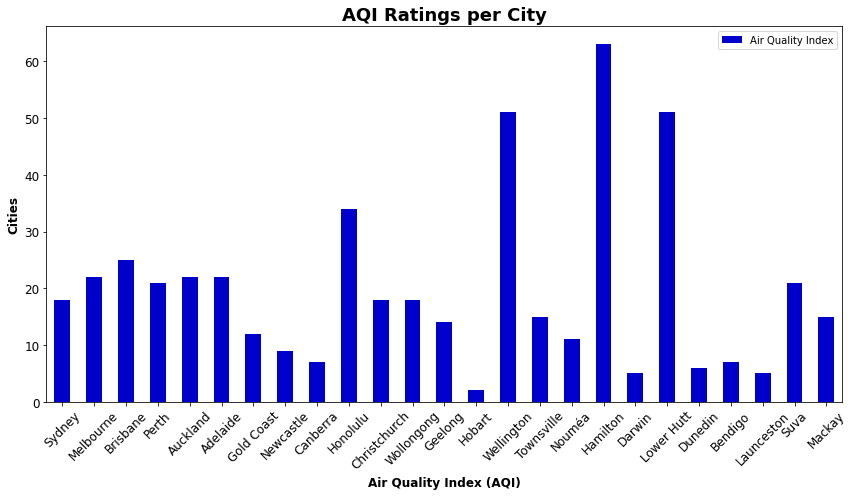

In [20]:
#Remove all rows that does not meet with the requirements for the bar graph
try:
    #Get names of indexes for which column Air Quality Index has text containing 0
    bar_indexNames = bar_pollution_df[bar_pollution_df['Air Quality Index'] == "0" ].index
    #Delete these row indexes from dataframe
    bar_pollution_df.drop(bar_indexNames , inplace=True)
except:
    #Print to note the code was unsuccessful
    print("Data not found")
    
#Create a bar graph to represents the concentration AQI for corresponding City
bar_pollution_df.plot('City',
                      'Air Quality Index', 
                      kind = 'bar', 
                      figsize = (12,7), 
                      rot = 45,
                      color = 'mediumblue',
                      title = 'AQI Ratings per City in Oceania',
                      fontsize = 12
                   )
plt.xlabel('Air Quality Index (AQI)', fontsize = 12, fontweight = 'bold')
plt.ylabel('Cities', fontsize = 12, fontweight = 'bold')
plt.title('AQI Ratings per City', fontsize = 18, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [21]:
print(bar_pollution_df.shape)

(25, 9)


In [22]:
print("                                   ***   CREATE A PIE GRAPH  ***                                                     ")

                                   ***   CREATE A PIE GRAPH  ***                                                     


In [23]:
#Remove all rows that does nnot meet with the requirements for the pie chart
try:
    #Get names of indexes for which column Carbon Monoxide (μg/m3) has text containing 0
    indexNames = pie_pollution_df[pie_pollution_df['Carbon Monoxide (μg/m3)'] == "0"].index
    #Delete these row indexes from dataFrame
    pie_pollution_df.drop(indexNames , inplace=True)
    #Print to note the code was successful
    print("CO has been found, and row deleted!")
except:
    #Print to note the code was unsuccessful
    print("Data not found")

try:
    indexNames = pie_pollution_df[pie_pollution_df['Hydrogen (μg/m3)'] == "0" ].index
    pie_pollution_df.drop(indexNames , inplace=True)
    print("H has been found, and row deleted!")
except:
    print("Data not found")
    
try:
    indexNames = pie_pollution_df[pie_pollution_df['Ozone (μg/m3)'] == "0" ].index
    pie_pollution_df.drop(indexNames , inplace=True)
    print("O3 has been found, and row deleted!")
except:
    print("Data not found")

try:
    indexNames = pie_pollution_df[pie_pollution_df['Sulphur Dioxide (μg/m3)'] == "0" ].index
    pie_pollution_df.drop(indexNames , inplace=True)
    print("SO2 has been found, and row deleted!")
except:
    print("Data not found")

try:
    indexNames = pie_pollution_df[pie_pollution_df['Fine Particle Matter (μg/m3)'] == "0" ].index
    pie_pollution_df.drop(indexNames , inplace=True)
    print("PM25 has been found, and row deleted!")
except:
    print("Data not found")

try:
    indexNames = pie_pollution_df[pie_pollution_df['Coarse Particulate Matter (μg/m3)'] == "0" ].index
    pie_pollution_df.drop(indexNames , inplace=True)
    print("PM10 has been found, and row deleted!")
except:
    print("Data not found")

CO has been found, and row deleted!
H has been found, and row deleted!
O3 has been found, and row deleted!
SO2 has been found, and row deleted!
PM25 has been found, and row deleted!
PM10 has been found, and row deleted!


In [24]:
print(pie_pollution_df.shape)

(5, 9)


In [25]:
try:
    new_co = list(pie_pollution_df['Carbon Monoxide (μg/m3)'])
    new_h = list(pie_pollution_df['Hydrogen (μg/m3)'])
    new_o3 = list(pie_pollution_df['Ozone (μg/m3)'])
    new_so2 = list(pie_pollution_df['Sulphur Dioxide (μg/m3)'])
    new_pm25 = list(pie_pollution_df['Fine Particle Matter (μg/m3)'])
    new_pm10 = list(pie_pollution_df['Coarse Particulate Matter (μg/m3)'])
except:
    print("Umm... something went wrong!")
    
try:
    mean_co = statistics.mean(new_co)
    mean_h = statistics.mean(new_h)
    mean_o3 = statistics.mean(new_o3)
    mean_so2 = statistics.mean(new_so2)
    mean_pm25 = statistics.mean(new_pm25)
    mean_pm10 = statistics.mean(new_pm10)
except:
    print("OK... something needs to be checked here...")

In [26]:
mean_oceania = [(mean_co), (mean_h), (mean_o3), (mean_so2), (mean_pm25), (mean_pm10)]

In [27]:
#A quick look at the average of each category in the dataframe
pie_pollution_df.mean(axis=0)

Air Quality Index                    16.800
Carbon Monoxide (μg/m3)               2.300
Hydrogen (μg/m3)                     67.752
Ozone (μg/m3)                        19.020
Sulphur Dioxide (μg/m3)               1.260
Fine Particle Matter (μg/m3)         18.000
Coarse Particulate Matter (μg/m3)    11.200
dtype: float64

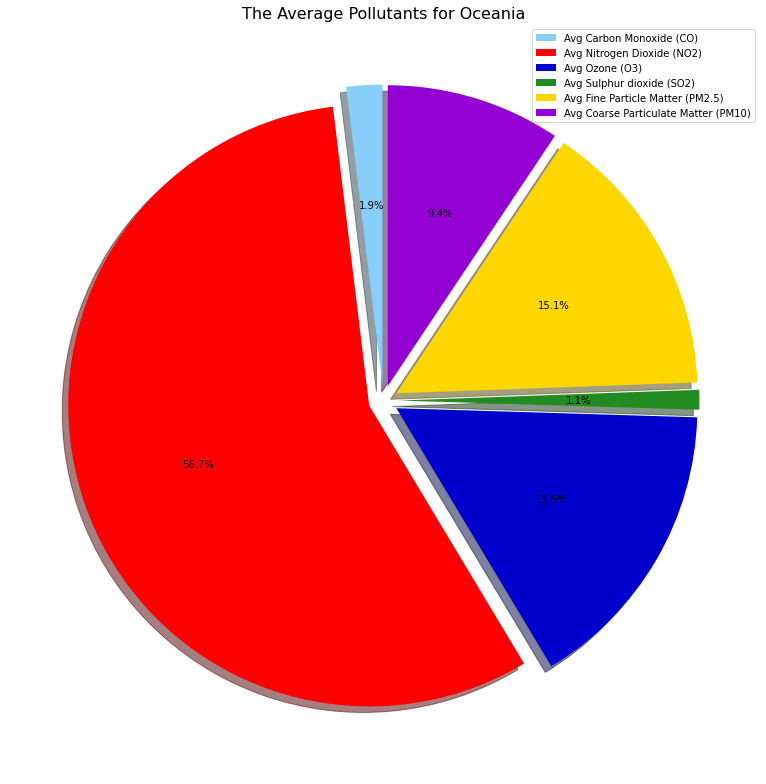

*All values are converted from μg/m3 to AQI levels using the EPA standard
*The Air Quality Index measures the pollutants ['co', 'no2', 'o3', 'so2', 'pm2.5', 'pm10']
*As well as temperature, wind, humidity, and pressure.
*For the sake of comparison, only the pollutant data is collected.


In [28]:
try:
    pollutants = ['co', 'no2', 'o3', 'so2', 'pm2.5', 'pm10']
    values = mean_oceania
except:
    print("")
    print("   ***   Ok, well the problem may be here...   ***   ")
    print("")
    
try:
    labels = pollutants
    colors = ['lightskyblue', 'red', 'mediumblue', 'forestgreen', 'gold', 'darkviolet',]
    explode =(0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
    fig, ax1 = plt.subplots(figsize = (11, 11)) 
    plt.pie(values,
            explode = explode,
            colors = colors,
            startangle = 90,
            autopct = '%.1f%%',
            shadow = True
)
    plt.title("The Average Pollutants for Oceania", fontsize = 16)
    ax1.legend(labels = ['Avg Carbon Monoxide (CO)',
                         'Avg Nitrogen Dioxide (NO2)',
                         'Avg Ozone (O3)',
                         'Avg Sulphur dioxide (SO2)',
                         'Avg Fine Particle Matter (PM2.5)',
                         'Avg Coarse Particulate Matter (PM10)'
],
                loc = 'upper right') 
    plt.tight_layout() 
    plt.show()
    print("*All values are converted from μg/m3 to AQI levels using the EPA standard")
    print(f"*The Air Quality Index measures the pollutants {pollutants}")
    print("*As well as temperature, wind, humidity, and pressure.")
    print("*For the sake of comparison, only the pollutant data is collected.")
except:
    print("")
    print("   ***   Yeah.... you're going to have to restart with a new City  ***   ")
    print("")

In [29]:
print("                        ***   CREATE A GMAP WITH MARKERS TO MARK CITIES USED   ***                                   ")

                        ***   CREATE A GMAP WITH MARKERS TO MARK CITIES USED   ***                                   


In [30]:
# Access maps with unique API key
gmaps.configure(gkey)

In [31]:
try:
    #Customize the size of the figure from gmaps
    figure_layout = {
        'width' : '400px',
        'height' : '300px',
        'border' : '1px solid black',
        'padding' : '1px',
        'margin' : '0 auto 0 auto'
    }
    fig = gmaps.figure(layout = figure_layout)
    print("This 1st part is successul. If you get an image, then congratulate yourself!")
except:
    print("data not found")
    
try:
    #Add markers to gmaps and display (Assign the marker layer to a variable)
    markers = gmaps.marker_layer(lat_lon)
    #Add the layer to the map
    fig.add_layer(markers)
    fig
except:
    print("Skip that! dont congratulate yourself just yet...")
    print("data not found")

This 1st part is successul. If you get an image, then congratulate yourself!
Skip that! dont congratulate yourself just yet...
data not found


In [32]:
pollution_df

,City,Geolocation,Air Quality Index,Carbon Monoxide (μg/m3),Hydrogen (μg/m3),Ozone (μg/m3),Sulphur Dioxide (μg/m3),Fine Particle Matter (μg/m3),Coarse Particulate Matter (μg/m3)
Rank,,,,,,,,,
1,Sydney,"[-33.872468, 151.213337]",18,3.4,81.4,18.4,1.5,22,9
2,Melbourne,"[-37.8073959, 144.97]",22,0.7,52.1,14.5,1.1,22,11
3,Brisbane,"[-27.4848, 153.032]",25,1.9,32,0,0,25,16
4,Perth,"[56.399327, -3.434182]",21,0,86.7,0,0,21,9
5,Auckland,"[-36.84742808, 174.7657304]",22,0,49.9,0,0,22,17
6,Adelaide,"[-34.929051, 138.601092]",22,0.4,49,0,0,22,12
7,Gold Coast,"[-27.9612, 153.402]",12,0,30.1,11.4,0,12,9
8,Newcastle,"[-32.93118, 151.7596]",9,0,46.5,0,1.5,1,9
9,Canberra,"[-35.285307, 149.131579]",7,0,43,6.5,0,1,1


In [33]:
print(pollution_df.shape)

(37, 9)


In [34]:
bar_pollution_df

,City,Geolocation,Air Quality Index,Carbon Monoxide (μg/m3),Hydrogen (μg/m3),Ozone (μg/m3),Sulphur Dioxide (μg/m3),Fine Particle Matter (μg/m3),Coarse Particulate Matter (μg/m3)
Rank,,,,,,,,,
1,Sydney,"[-33.872468, 151.213337]",18,3.4,81.4,18.4,1.5,22,9
2,Melbourne,"[-37.8073959, 144.97]",22,0.7,52.1,14.5,1.1,22,11
3,Brisbane,"[-27.4848, 153.032]",25,1.9,32,0,0,25,16
4,Perth,"[56.399327, -3.434182]",21,0,86.7,0,0,21,9
5,Auckland,"[-36.84742808, 174.7657304]",22,0,49.9,0,0,22,17
6,Adelaide,"[-34.929051, 138.601092]",22,0.4,49,0,0,22,12
7,Gold Coast,"[-27.9612, 153.402]",12,0,30.1,11.4,0,12,9
8,Newcastle,"[-32.93118, 151.7596]",9,0,46.5,0,1.5,1,9
9,Canberra,"[-35.285307, 149.131579]",7,0,43,6.5,0,1,1


In [35]:
print(bar_pollution_df.shape)

(25, 9)


In [36]:
pie_pollution_df

,City,Geolocation,Air Quality Index,Carbon Monoxide (μg/m3),Hydrogen (μg/m3),Ozone (μg/m3),Sulphur Dioxide (μg/m3),Fine Particle Matter (μg/m3),Coarse Particulate Matter (μg/m3)
Rank,,,,,,,,,
1,Sydney,"[-33.872468, 151.213337]",18,3.4,81.4,18.4,1.5,22,9
2,Melbourne,"[-37.8073959, 144.97]",22,0.7,52.1,14.5,1.1,22,11
15,Wollongong,"[-34.41706, 150.8873]",18,1.2,81.3,18.4,1.5,15,14
26,Darwin,"[-12.467003, 130.850577]",5,2.8,70.76,5.4,0.7,10,4
34,Suva,"[36.03392, 138.1074268]",21,3.4,53.2,38.4,1.5,21,18


In [37]:
print(pie_pollution_df.shape)

(5, 9)
